# Lectura de Datos

In [2022]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

In [2023]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

In [2024]:
import warnings
warnings.filterwarnings('ignore')

In [2025]:
df = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/train_PAY_AMT1.csv',
                             delimiter='|')
df.shape

(5625, 23)

In [2027]:
df.head()

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,22944,"90,000.00",2,3,1,42,0,0,0,0,0,"34,672.00","35,270.00","36,150.00","36,528.00","37,128.00","37,348.00","1,562.00","1,832.00","1,600.00","1,000.00","1,000.00",0.00
1,28806,"40,000.00",2,2,1,33,2,2,2,2,2,"23,734.00","24,644.00","25,749.00","26,127.00","26,401.00","25,839.00","1,600.00","1,800.00","1,100.00","1,000.00",0.00,"2,300.00"
2,26865,"40,000.00",2,1,2,26,0,0,0,-1,-1,"6,223.00","7,944.00","8,961.00","3,090.00",390.00,795.00,"2,000.00","1,196.00","1,000.00","1,950.00",795.00,"1,170.00"
3,3082,"90,000.00",2,3,2,50,0,0,0,0,0,"83,939.00","86,583.00","87,014.00","46,293.00","47,576.00","46,663.00","4,000.00","2,500.00","2,000.00","2,000.00","2,000.00","2,000.00"
4,10159,"30,000.00",2,2,2,22,0,0,0,0,0,"30,123.00","30,299.00","27,758.00","22,720.00","19,136.00","14,452.00","1,600.00","2,000.00","2,000.00",614.00,924.00,0.00


__Diccionario de datos__

* CUSTOMER ID: Identificador de cada cliente
* LIMIT BAL: Monto de la línea de crédito
* SEX: Genero (1=masculino, 2=femenino)
* EDUCATION: (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
* MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
* AGE: Edad en años.
* PAY 0: Estatus de pago en Septiembre, 2005
    (   -2=no uso (non use),
    0=uso, 
    -1=pago correcto, 
    1=pago retrasado por un mes, 
    2=pago retrasado por dos meses , 
    ... 8=pago retrasado por ocho meses, pago retrasado por nueve o mas meses).
* PAY 2: Estatus de pago en Agosto, 2005 (La escala es igual que en PAY 0).
* PAY 3: Estatus de pago en Julio, 2005 (La escala es igual que en PAY 0).
* PAY 4: Estatus de pago en Junio, 2005 (La escala es igual que en PAY 0).
* PAY 5: Estatus de pago en Mayo, 2005 (La escala es igual que en PAY 0).
* PAY 6: Estatus de pago en Abril, 2005 (La escala es igual que en PAY 0).
* BILL AMT1: Monto por pagar en Septiembre, 2005
* BILL AMT2: Monto por pagar en Agosto, 2005
* BILL AMT3: Monto por pagar en Julio, 2005
* BILL AMT4: Monto por pagar en Junio, 2005
* BILL AMT5: Monto por pagar en Mayo, 2005
* BILL AMT6: Monto por pagar en Abril, 2005
* PAY AMT1: Cantidad pagada en Septiembre, 2005
* PAY AMT2: Cantidad pagada en Agosto, 2005
* PAY AMT3: Cantidad pagada en Julio, 2005
* PAY AMT4: Cantidad pagada en Junio, 2005
* PAY AMT5: Cantidad pagada en Mayo, 2005
* PAY AMT6: Cantidad pagada en Abril, 2005
* default.payment.next.month: Incumplimiento de pago (1=si, 0=no)


__Objetivo (REGRESIÓN)__

PAY AMT1: Cantidad pagada en Septiembre, 2005. Para esta solución deben usarse los conjuntos train_PAY_AMT1.csv y val PAY_AMT1.csv.

# Análisis Exploratorio de Datos

In [1954]:
df.isna().sum() / df.shape[0]*100

CUSTOMER_ID   0.00
LIMIT_BAL     0.00
SEX           0.00
EDUCATION     0.00
MARRIAGE      0.00
AGE           0.00
PAY_2         0.00
PAY_3         0.00
PAY_4         0.00
PAY_5         0.00
PAY_6         0.00
BILL_AMT1     0.00
BILL_AMT2     0.00
BILL_AMT3     0.00
BILL_AMT4     0.00
BILL_AMT5     0.00
BILL_AMT6     0.00
PAY_AMT1      0.00
PAY_AMT2      0.00
PAY_AMT3      0.00
PAY_AMT4      0.00
PAY_AMT5      0.00
PAY_AMT6      0.00
dtype: float64

In [1955]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,"5,625.00","14,975.77","8,660.72",7.00,"7,464.00","15,090.00","22,456.00","29,995.00"
LIMIT_BAL,"5,625.00","169,135.29","133,085.18","10,000.00","50,000.00","140,000.00","240,000.00","1,000,000.00"
SEX,"5,625.00",1.60,0.49,1.00,1.00,2.00,2.00,2.00
EDUCATION,"5,625.00",1.84,0.78,0.00,1.00,2.00,2.00,6.00
MARRIAGE,"5,625.00",1.54,0.52,0.00,1.00,2.00,2.00,3.00
AGE,"5,625.00",35.47,9.06,21.00,28.00,34.00,41.00,69.00
PAY_2,"5,625.00",-0.11,1.20,-2.00,-1.00,0.00,0.00,7.00
PAY_3,"5,625.00",-0.14,1.22,-2.00,-1.00,0.00,0.00,8.00
PAY_4,"5,625.00",-0.21,1.18,-2.00,-1.00,0.00,0.00,8.00
PAY_5,"5,625.00",-0.26,1.13,-2.00,-1.00,0.00,0.00,8.00


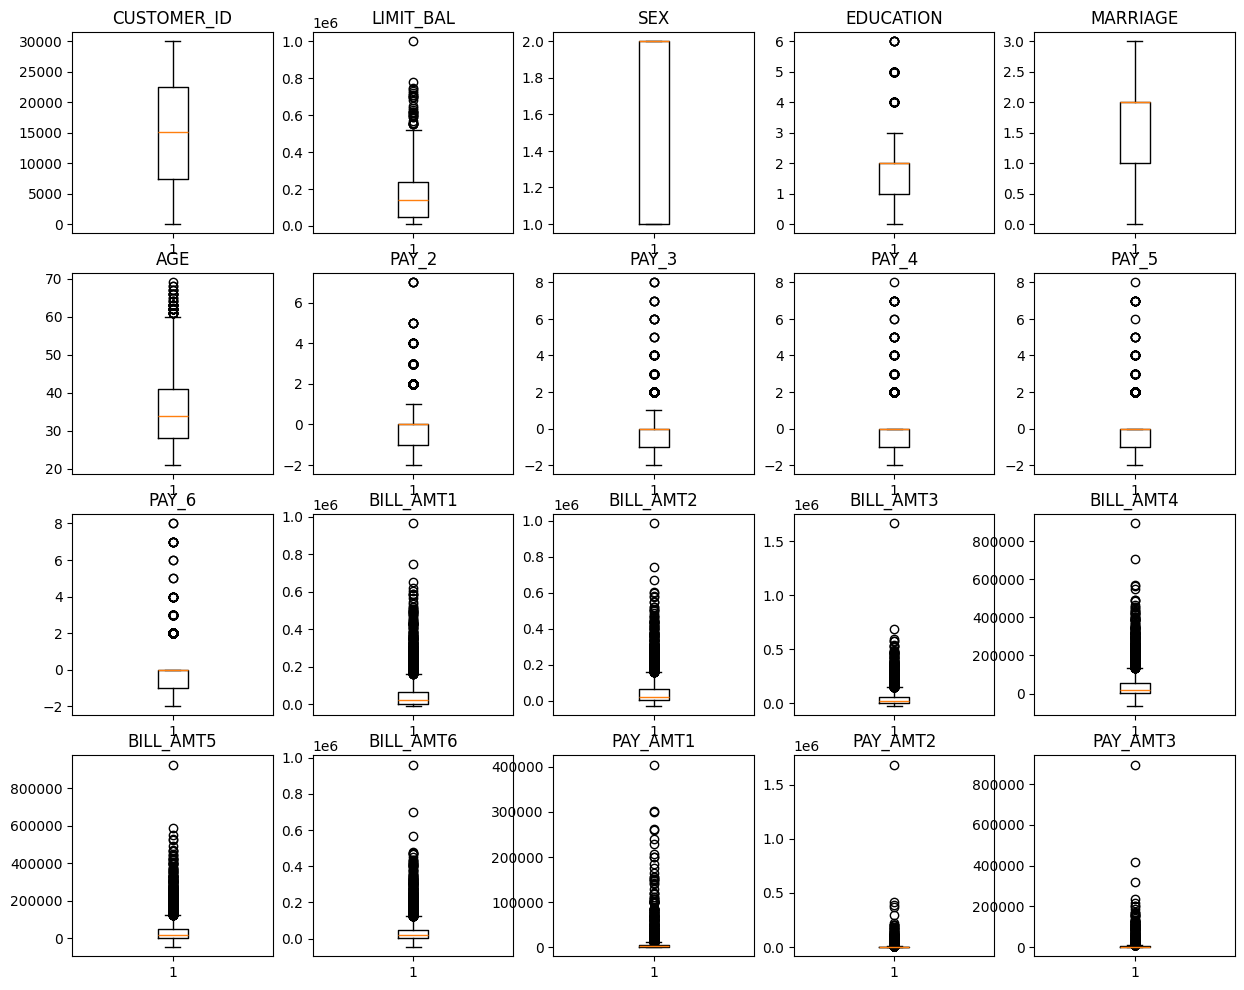

In [1956]:
# numeric columns in DataFrame
col_df_num = df.columns.to_list()

n_cols = 5
n_rows = 4

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(15, 12))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

### Eliminamos outliers

In [1957]:
df[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2']].describe(percentiles=[0.01, .25, .5, .75, .99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
PAY_AMT6,"5,625.00","5,621.63","19,638.48",0.00,0.00,200.00,"1,500.00","4,173.00","88,110.36","527,143.00"
PAY_AMT5,"5,625.00","5,081.42","16,534.31",0.00,0.00,287.00,"1,509.00","4,100.00","70,020.76","388,071.00"
PAY_AMT4,"5,625.00","4,714.09","13,916.82",0.00,0.00,303.00,"1,528.00","4,000.00","64,941.92","400,046.00"
PAY_AMT3,"5,625.00","5,387.47","19,684.13",0.00,0.00,428.00,"1,900.00","4,600.00","76,611.24","896,040.00"
PAY_AMT2,"5,625.00","6,143.61","28,468.70",0.00,0.00,762.00,"2,011.00","5,000.00","83,730.80","1,684,259.00"


In [1958]:
df[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2']].describe(percentiles=[0.01, .25, .5, .75, .99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
PAY_AMT6,"5,625.00","5,621.63","19,638.48",0.00,0.00,200.00,"1,500.00","4,173.00","88,110.36","527,143.00"
PAY_AMT5,"5,625.00","5,081.42","16,534.31",0.00,0.00,287.00,"1,509.00","4,100.00","70,020.76","388,071.00"
PAY_AMT4,"5,625.00","4,714.09","13,916.82",0.00,0.00,303.00,"1,528.00","4,000.00","64,941.92","400,046.00"
PAY_AMT3,"5,625.00","5,387.47","19,684.13",0.00,0.00,428.00,"1,900.00","4,600.00","76,611.24","896,040.00"
PAY_AMT2,"5,625.00","6,143.61","28,468.70",0.00,0.00,762.00,"2,011.00","5,000.00","83,730.80","1,684,259.00"


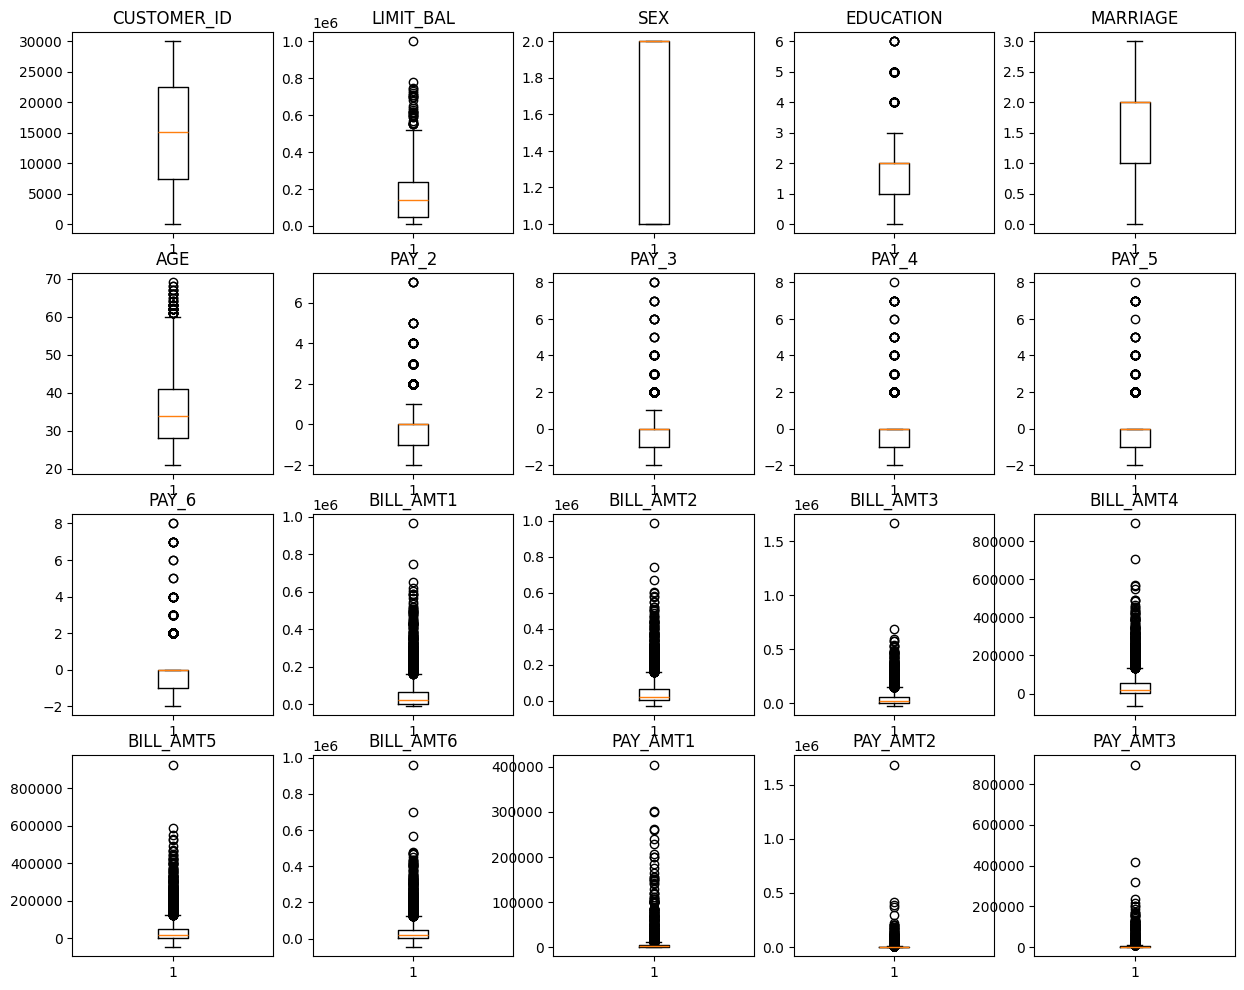

In [1959]:
# numeric columns in DataFrame
col_df_num = df.columns.to_list()

n_cols = 5
n_rows = 4

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(15, 12))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

# Ingeniería de Variables

## Número de meses con retraso

In [1960]:
# Orden de los meses
df[ ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2'] ].sample(5)

,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2
4095,0,0,0,0,0
1841,0,0,-1,2,-1
2951,0,0,0,0,0
1745,0,0,0,0,0
4044,0,0,0,0,0


In [1961]:
df[ 'Num_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: (row > 0).sum(), axis=1)
df[ 'Max_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0, row)), default=0), axis=1)
df[ 'Max_Retraso_Reciente' ] = df[['PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)

In [1962]:
lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']

# orden de los meses y total de meses de retraso en el pago
df[ ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2'] + lst_var_1 ].sample(5)

,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,Num_Meses_Con_Retraso,Max_Meses_Con_Retraso,Max_Retraso_Reciente
1880,-2,-2,-2,-2,-2,0,0,0
1169,0,0,0,0,0,0,0,0
366,0,0,0,0,0,0,0,0
2382,0,0,0,0,0,0,0,0
1942,0,0,0,0,0,0,0,0


### Saldo de la deuda

In [1963]:
df[['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2', 'BILL_AMT1']].sample(5)

,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1
1751,0.00,"22,000.00","22,000.00","23,180.00","24,045.00","17,187.00"
47,0.00,780.00,"19,780.00","19,499.00","18,864.00",390.00
2274,"4,961.00","3,676.00","1,862.00","1,508.00","1,094.00",680.00
4683,"77,214.00","80,339.00","89,944.00","84,613.00","90,687.00","88,832.00"
1456,"19,080.00","19,584.00","49,952.00","51,463.00","50,525.00","49,911.00"


In [1964]:
df[ 'Promedio_Deuda_Ultimos_3_Meses' ] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3']].apply(lambda row: row.mean(), axis=1)
df[ 'Cambio_Deuda_Reciente' ] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5']].apply(lambda row: row['BILL_AMT2'] - row['BILL_AMT3'], axis=1)
df[ 'Suma_Deuda_Total_Historica' ] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
df[ 'Max_Deuda_Historica' ] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
df[ 'Utilizacion_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100*row['LIMIT_BAL'], axis=1)
df[ 'Prom_porcen_uso_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100, axis=1)
df[ 'Utilizacion_Credito_Promedio' ] = df.apply(lambda row: (row[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()/ row['LIMIT_BAL']*6)*100 , axis=1)

In [1965]:
lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                'Utilizacion_Credito_Actual', 'Prom_porcen_uso_Credito_Actual', 'Utilizacion_Credito_Promedio']
df[['LIMIT_BAL', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3','BILL_AMT2', 'BILL_AMT1'] + lst_var_2].sample(5)

,LIMIT_BAL,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1,Promedio_Deuda_Ultimos_3_Meses,Cambio_Deuda_Reciente,Suma_Deuda_Total_Historica,Max_Deuda_Historica,Utilizacion_Credito_Actual,Prom_porcen_uso_Credito_Actual,Utilizacion_Credito_Promedio
4415,"240,000.00","2,928.00","1,335.00","7,795.00","2,088.00","7,976.00","13,989.00","8,017.67","5,888.00","36,111.00","13,989.00","1,398,900.00",5.83,90.28
2889,"10,000.00","9,403.00","9,250.00","9,941.00","9,900.00","9,974.00","9,984.00","9,952.67",74.00,"58,452.00","9,984.00","998,400.00",99.84,"3,507.12"
1843,"80,000.00",0.00,0.00,0.00,"16,000.00","31,748.00","46,911.00","31,553.00","15,748.00","94,659.00","46,911.00","4,691,100.00",58.64,709.94
1044,"360,000.00","19,487.00","8,676.00","49,005.00","64,069.00","52,686.00","33,654.00","50,136.33","-11,383.00","227,577.00","64,069.00","3,365,400.00",9.35,379.30
3315,"80,000.00","45,434.00","45,985.00","78,323.00","80,107.00","79,353.00","79,673.00","79,711.00",-754.00,"408,875.00","80,107.00","7,967,300.00",99.59,"3,066.56"


### Cantidad pagada

In [1966]:
df[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2']].sample(5)

,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2
684,800.00,700.00,800.00,800.00,"1,600.00"
1872,"1,350.00","3,000.00","1,662.00","10,000.00","7,172.00"
4189,0.00,0.00,0.00,0.00,0.00
1450,0.00,0.00,0.00,0.00,0.00
3735,"1,980.00",381.00,"3,766.00","1,217.00",0.00


In [1967]:
def get_mean_pay(row):
    m = []
    if row['PAY_AMT6'] > 0:
        m.append( row['BILL_AMT6']/row['PAY_AMT6'] )
    if row['PAY_AMT5'] > 0:
        m.append( row['BILL_AMT5']/row['PAY_AMT5'] )
    if row['PAY_AMT4'] > 0:
        m.append( row['BILL_AMT4']/row['PAY_AMT4'] )
    if row['PAY_AMT3'] > 0:
        m.append( row['BILL_AMT3']/row['PAY_AMT3'] )
    if row['PAY_AMT2'] > 0:
        m.append( row['BILL_AMT2']/row['PAY_AMT2'] )
    
    if len(m) != 0:
        return  sum(m) / len(m)
    
    return 0

In [1968]:
df['Promedio_Pago_Ultimos_Meses'] = df[['PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum()/3, axis=1)
df['Suma_Pagos_Historicos'] = df[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum(), axis=1)
df['Prom_Porcentaje_Pagos_Historicos'] = df.apply(lambda row: get_mean_pay(row=row), axis=1)
df['Cambio_Pago_Reciente'] = df.apply(lambda row: row['PAY_AMT2'] - row['PAY_AMT3'], axis=1)
df['Ratio_Pago_Factura_Anterior'] = np.where(df['BILL_AMT2'] > 0, (df['PAY_AMT2'] / df['BILL_AMT2'])*100, 0)

In [1969]:
df['LIMIT_BAL_sq'] = df['LIMIT_BAL'] ** 2

In [1970]:
lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Prom_Porcentaje_Pagos_Historicos',
             'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior', 'LIMIT_BAL_sq']
df[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2'] + lst_var_3].sample(5)

,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,Promedio_Pago_Ultimos_Meses,Suma_Pagos_Historicos,Prom_Porcentaje_Pagos_Historicos,Cambio_Pago_Reciente,Ratio_Pago_Factura_Anterior,LIMIT_BAL_sq
3038,60.00,60.00,0.00,0.00,120.00,40.00,240.00,1.14,120.00,55.81,"900,000,000.00"
2872,0.00,0.00,"1,305.00",0.00,"2,505.00","1,270.00","3,810.00",-0.00,"2,505.00",0.00,"129,600,000,000.00"
4741,"5,002.00","2,000.00","5,017.00","2,009.00","1,844.00","2,956.67","15,872.00",16.87,-165.00,4.01,"6,400,000,000.00"
1711,"15,664.00",556.00,"1,936.00","1,796.00","31,967.00","11,899.67","51,919.00",4.42,"30,171.00","2,641.90","96,100,000,000.00"
320,0.00,0.00,0.00,0.00,"1,400.00",466.67,"1,400.00",28.76,"1,400.00",3.48,"1,600,000,000.00"


### Perfil del cliente

In [1971]:
df[ 'Edad_x_Limite_Credito' ] = df.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

In [1972]:
lst_var_4 = ['Edad_x_Limite_Credito']
df[['AGE', 'LIMIT_BAL'] + lst_var_4].sample(5)

,AGE,LIMIT_BAL,Edad_x_Limite_Credito
5622,37,"270,000.00","9,990,000.00"
826,51,"360,000.00","18,360,000.00"
1302,56,"30,000.00","1,680,000.00"
5435,57,"70,000.00","3,990,000.00"
819,24,"50,000.00","1,200,000.00"


In [1973]:
# (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
df['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True) # clasificacion de valores desconocido
df['EDUCATION'].replace({3:2, 2:3}, inplace=True) # cambiamos el orden de los valores, para darle mas peso
display(df['EDUCATION'].value_counts().sort_index())
df['EDUCATION'] = df['EDUCATION']**2
display(df['EDUCATION'].value_counts().sort_index())

EDUCATION
0      75
1    2018
2     951
3    2581
Name: count, dtype: int64

EDUCATION
0      75
1    2018
4     951
9    2581
Name: count, dtype: int64

In [1974]:
# * MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
display(df['MARRIAGE'].value_counts().sort_index())
df['MARRIAGE'].replace({0:2, 3:2}, inplace=True)
display(df['MARRIAGE'].value_counts().sort_index())

MARRIAGE
0       7
1    2611
2    2944
3      63
Name: count, dtype: int64

MARRIAGE
1    2611
2    3014
Name: count, dtype: int64

In [1975]:
df['SEX'] = df['SEX'].astype(str)
df['EDUCATION'] = df['EDUCATION'].astype(str)
df['MARRIAGE'] = df['MARRIAGE'].astype(str)

In [1976]:
df['PAY_2'] = df['PAY_2'].map(lambda x: x if x > 0 else 0)
df['PAY_3'] = df['PAY_3'].map(lambda x: x if x > 0 else 0)
df['PAY_4'] = df['PAY_4'].map(lambda x: x if x > 0 else 0)
df['PAY_5'] = df['PAY_5'].map(lambda x: x if x > 0 else 0)
df['PAY_6'] = df['PAY_6'].map(lambda x: x if x > 0 else 0)

df['PAY_2'] = df['PAY_2'].astype(str)
df['PAY_3'] = df['PAY_3'].astype(str)
df['PAY_4'] = df['PAY_4'].astype(str)
df['PAY_5'] = df['PAY_5'].astype(str)
df['PAY_6'] = df['PAY_6'].astype(str)

## Clasificación de variables

In [1977]:
# Unidad muestral
var_um = ['CUSTOMER_ID']

# Variables categoricas
var_cat = ['SEX', 'EDUCATION', 'MARRIAGE',
                       'PAY_2',    'PAY_3',    'PAY_4',    'PAY_5',    'PAY_6']

# Variables numericas
var_num = ['LIMIT_BAL','AGE',
           'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
          ]# + lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4
          #] + lst_var_4

var_tgt = ['PAY_AMT1']

print( len( var_um + var_cat + var_num + var_tgt ) )
print( df.shape )

23
(5625, 40)


In [1978]:
X = df.drop(columns=var_cat)[var_num].join(pd.get_dummies(df[var_cat], dtype='int'))
y = df[ var_tgt ]

In [1979]:
X.sample(5)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_4,EDUCATION_9,MARRIAGE_1,MARRIAGE_2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_7,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
5286,"80,000.00",40,780.00,390.00,390.00,"25,190.00",390.00,390.00,390.00,"25,190.00",390.00,390.00,"9,278.00",0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1985,"80,000.00",44,"57,076.00","58,358.00","58,992.00","62,696.00","64,148.00","62,965.00","2,200.00","4,700.00","2,600.00",0.00,"4,400.00",1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1302,"30,000.00",56,"30,826.00","30,384.00","29,656.00","28,914.00","28,172.00","27,444.00",0.00,0.00,0.00,0.00,0.00,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3049,"90,000.00",40,"89,789.00","88,337.00","85,248.00","86,483.00","87,765.00","85,855.00",0.00,"3,500.00","3,500.00","3,500.00","3,200.00",0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1164,"290,000.00",55,"21,372.00","25,278.00","29,127.00","32,901.00","36,634.00","40,460.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00",1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1980]:
X.sample(5)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_4,EDUCATION_9,MARRIAGE_1,MARRIAGE_2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_7,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
2829,"50,000.00",24,"49,387.00","50,284.00","50,639.00","48,563.00","49,628.00","48,293.00","1,727.00","1,846.00","1,777.00","1,665.00","1,500.00",0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2897,"80,000.00",28,"80,849.00","79,422.00","76,834.00","76,333.00","49,942.00","50,191.00","9,000.00","3,365.00","2,000.00","2,200.00","1,700.00",1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2034,"500,000.00",61,"11,430.00","29,015.00","25,364.00","19,550.00","21,096.00","23,491.00","25,428.00","9,575.00","11,116.00","15,063.00",217.00,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1270,"10,000.00",33,"1,655.00","1,473.00",390.00,390.00,540.00,150.00,390.00,390.00,540.00,150.00,"3,780.00",1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2869,"70,000.00",30,"36,201.00","25,510.00","11,402.00","8,464.00","6,464.00","-1,000.00","1,000.00",0.00,0.00,0.00,0.00,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<Axes: >

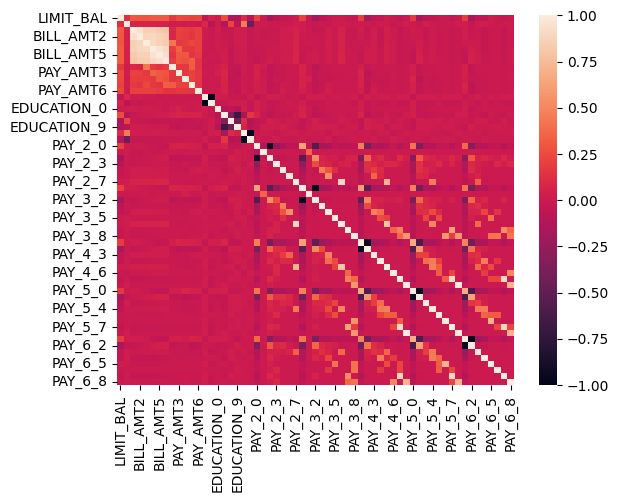

In [1981]:
sns.heatmap(X.corr())

In [1982]:
#sns.pairplot( X_train.sample(1000) )

# Modelo

## Mejores variables

In [1983]:
X.shape

(5625, 61)

In [1984]:
kb = SelectKBest( k=15, score_func=f_regression )
kb.fit(X, y)
kb.get_feature_names_out()
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
print(ls_best)

X_train = pd.DataFrame(kb.transform(X), columns=ls_best)
y_train = y

X_train_cols = ls_best

['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1', 'PAY_2_0', 'PAY_2_2']


In [1985]:
X_train.sample(5)

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_1,PAY_2_0,PAY_2_2
1298,"120,000.00","20,877.00","21,909.00","22,922.00","23,376.00","23,866.00","24,339.00","1,382.00",836.00,866.00,870.00,902.00,1.00,1.00,0.00
2586,"50,000.00","5,703.00","7,596.00","8,511.00","10,361.00","11,039.00","11,107.00","1,200.00","2,000.00","1,000.00",400.00,"1,000.00",0.00,1.00,0.00
3290,"40,000.00","38,741.00","36,840.00","37,868.00","36,139.00","39,114.00","38,429.00","1,942.00","1,600.00","3,500.00",0.00,"2,818.00",1.00,1.00,0.00
884,"210,000.00","78,632.00","49,707.00","37,998.00","32,062.00","27,056.00","15,955.00","2,200.00","2,008.00","2,000.00","5,000.00","5,000.00",0.00,1.00,0.00
5330,"170,000.00","137,823.00","137,199.00","136,331.00","123,913.00","122,657.00","122,225.00","5,000.00","5,000.00","5,000.00","5,000.00","4,000.00",0.00,1.00,0.00


## Ajuste del modelo

SCORE:  0.36296804993011733 [0.41350366 0.05533944 0.14401975 0.40882134]
MEAN 0.25542104778648544
STD 0.15887468447624142
R-squared: 0.3630
Mean squared error: 178446777.4620
Root mean squared error: 13358.3973
Mean Absolute Error: 5158.2651


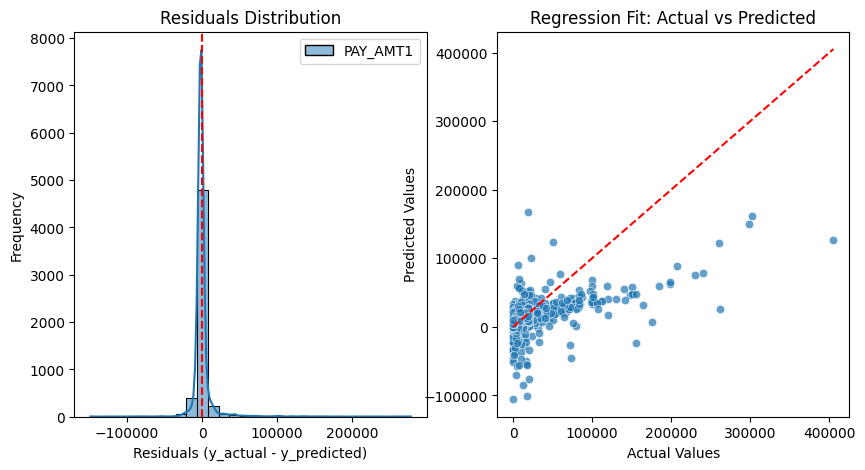

LIMIT_BAL = 0.0121018934
BILL_AMT1 = -0.2702673979
BILL_AMT2 = 0.4443596005
BILL_AMT3 = -0.1627458604
BILL_AMT4 = 0.0288481656
BILL_AMT5 = 0.0284486881
BILL_AMT6 = -0.0474886
PAY_AMT2 = 0.1789145236
PAY_AMT3 = -0.0057789722
PAY_AMT4 = 0.0782056863
PAY_AMT5 = 0.0864266534
PAY_AMT6 = 0.0609107423
EDUCATION_1 = 51.5545420507
PAY_2_0 = 3487.1455765189
PAY_2_2 = 1052.8129495487
Intercept: [-2416.97496561]

Feature Coefficients:
         Feature  Coefficient
0     LIMIT_BAL         0.01
1     BILL_AMT1        -0.27
2     BILL_AMT2         0.44
3     BILL_AMT3        -0.16
4     BILL_AMT4         0.03
5     BILL_AMT5         0.03
6     BILL_AMT6        -0.05
7      PAY_AMT2         0.18
8      PAY_AMT3        -0.01
9      PAY_AMT4         0.08
10     PAY_AMT5         0.09
11     PAY_AMT6         0.06
12  EDUCATION_1        51.55
13      PAY_2_0     3,487.15
14      PAY_2_2     1,052.81


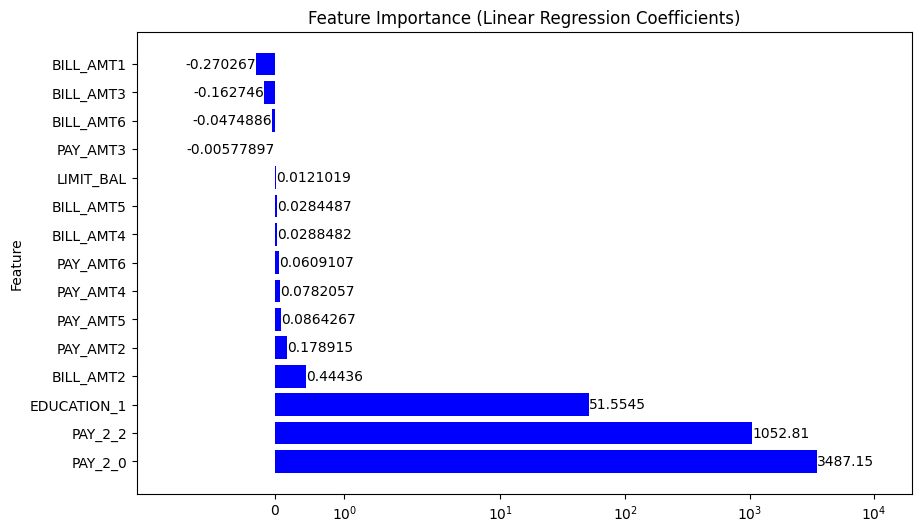

In [2020]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("SCORE: ", linreg.score(X_train, y_train), end=' ')
ls_scores = cross_val_score(cv = 4, estimator=linreg, X=X_train, y=y_train)
print(ls_scores)
print("MEAN", np.mean(ls_scores))
print("STD", np.std(ls_scores))

# Make predictions.
y_pred = linreg.predict(X_train) 
y_train = pd.DataFrame(y_train)


# Calculate and print errors.
r2 = r2_score(y_train, y_pred)
print(f"R-squared: {r2:.4f}")
mse = mean_squared_error(y_train, y_pred)
print(f"Mean squared error: {mse:.4f}")
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")
mae = mean_absolute_error(y_pred=y_pred, y_true=y_train)
print(f"Mean Absolute Error: {mae:.4f}")

plt.figure(figsize=(10,5))
# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
residuals = y_train - linreg.predict(X_train)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

x_ = np.array(y_train)[:,0]
y_ = y_pred[:,0]
# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=x_, y=y_, alpha=0.7)
plt.plot([min(x_), max(x_)], [min(x_), max(x_)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#print("Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train_cols[i], "=", linreg.coef_[0][i].round(10))

# Extraer información del modelo
print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame({"Feature": X_train_cols, "Coefficient": linreg.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
ax = plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="blue")
plt.xlim(-2, 20000)
plt.xscale('symlog')  # Use 'symlog' for signed data (both positive and negative)
plt.bar_label(ax, label_type='edge')
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

In [1987]:
pd.to_pickle(linreg, "/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/BlasDuranGustavo_PAY_AMT1.pickle")

In [1988]:
def procesar_dataframe(df):

    df[ 'Num_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_AMT2']].apply(lambda row: (row > 0).sum(), axis=1)
    df[ 'Max_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_AMT2']].apply(lambda row: max(list(filter(lambda x: x > 0, row)), default=0), axis=1)
    df[ 'Max_Retraso_Reciente' ] = df[['PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)

    lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']

    df[ 'Promedio_Deuda_Ultimos_3_Meses' ] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3']].apply(lambda row: row.mean(), axis=1)
    df[ 'Cambio_Deuda_Reciente' ] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5']].apply(lambda row: row['BILL_AMT2'] - row['BILL_AMT3'], axis=1)
    df[ 'Suma_Deuda_Total_Historica' ] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
    df[ 'Max_Deuda_Historica' ] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
    df[ 'Utilizacion_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100*row['LIMIT_BAL'], axis=1)
    df[ 'Prom_porcen_uso_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT1'] / row['LIMIT_BAL'])*100, axis=1)
    df[ 'Utilizacion_Credito_Promedio' ] = df.apply(lambda row: (row[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()/ row['LIMIT_BAL']*6)*100 , axis=1)

    lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                'Utilizacion_Credito_Actual', 'Prom_porcen_uso_Credito_Actual', 'Utilizacion_Credito_Promedio']
    
    df['Promedio_Pago_Ultimos_Meses'] = df[['PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum()/3, axis=1)
    df['Suma_Pagos_Historicos'] = df[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2']].apply(lambda row: row.sum(), axis=1)
    df['Prom_Porcentaje_Pagos_Historicos'] = df.apply(lambda row: get_mean_pay(row=row), axis=1)
    df['Cambio_Pago_Reciente'] = df.apply(lambda row: row['PAY_AMT2'] - row['PAY_AMT3'], axis=1)
    df['Ratio_Pago_Factura_Anterior'] = np.where(df['BILL_AMT2'] > 0, (df['PAY_AMT2'] / df['BILL_AMT2'])*100, 0)

    df['LIMIT_BAL_sq'] = df['LIMIT_BAL'] ** 2

    lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Prom_Porcentaje_Pagos_Historicos',
             'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior', 'LIMIT_BAL_sq']
    
    df[ 'Edad_x_Limite_Credito' ] = df.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

    lst_var_4 = ['Edad_x_Limite_Credito']

    # (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
    df['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True) # clasificacion de valores desconocido
    df['EDUCATION'].replace({3:2, 2:3}, inplace=True) # cambiamos el orden de los valores, para darle mas peso
    #display(df['EDUCATION'].value_counts().sort_index())
    df['EDUCATION'] = df['EDUCATION']**2
    #display(df['EDUCATION'].value_counts().sort_index())

    # * MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
    # display(df['MARRIAGE'].value_counts().sort_index())
    df['MARRIAGE'].replace({0:2, 3:2}, inplace=True)
    # display(df['MARRIAGE'].value_counts().sort_index())

    df['SEX'] = df['SEX'].astype(str)
    df['EDUCATION'] = df['EDUCATION'].astype(str)
    df['MARRIAGE'] = df['MARRIAGE'].astype(str)

    df['PAY_2'] = df['PAY_2'].map(lambda x: x if x > 0 else 0)
    df['PAY_3'] = df['PAY_3'].map(lambda x: x if x > 0 else 0)
    df['PAY_4'] = df['PAY_4'].map(lambda x: x if x > 0 else 0)
    df['PAY_5'] = df['PAY_5'].map(lambda x: x if x > 0 else 0)
    df['PAY_6'] = df['PAY_6'].map(lambda x: x if x > 0 else 0)

    df['PAY_2'] = df['PAY_2'].astype(str)
    df['PAY_3'] = df['PAY_3'].astype(str)
    df['PAY_4'] = df['PAY_4'].astype(str)
    df['PAY_5'] = df['PAY_5'].astype(str)
    df['PAY_6'] = df['PAY_6'].astype(str)

    # Unidad muestral
    var_um = ['CUSTOMER_ID']

    # Variables categoricas
    var_cat = ['SEX', 'EDUCATION', 'MARRIAGE',
                        'PAY_2',    'PAY_3',    'PAY_4',    'PAY_5',    'PAY_6']

    # Variables numericas
    var_num = ['LIMIT_BAL','AGE',
            'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',              
            ] + lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4
            #] + lst_var_4

    var_tgt = ['PAY_AMT1']

    X = df.drop(columns=var_cat)[ var_um + var_num ].join(pd.get_dummies(df[var_cat], dtype='int'))
    
    return X

#ls_best = ['LIMIT_BAL','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT3','PAY_AMT4','PAY_AMT5',
#           'Promedio_Deuda_Ultimos_3_Meses','Cambio_Deuda_Reciente','Suma_Deuda_Total_Historica','Max_Deuda_Historica','Promedio_Pago_Ultimos_Meses','Suma_Pagos_Historicos']

df = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/val_PAY_AMT1.csv',
                             delimiter='|')
df.head()
val_PAY_AMT1 = procesar_dataframe(df)[['CUSTOMER_ID'] + ls_best]
print( val_PAY_AMT1.shape )
val_PAY_AMT1.head()


(1875, 16)


,CUSTOMER_ID,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDUCATION_1,PAY_2_0,PAY_2_2
0,4130,"30,000.00",200.00,200.00,200.00,200.00,"29,847.00","30,089.00",0.00,0.00,"29,847.00",340.00,0.00,0,0,1
1,4150,"180,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0
2,19181,"250,000.00","69,770.00","70,954.00","70,681.00","69,497.00","41,367.00","17,004.00","1,914.00","1,517.00","2,000.00","8,001.00",295.00,0,1,0
3,2595,"20,000.00",780.00,0.00,390.00,390.00,390.00,"12,190.00",390.00,390.00,390.00,"12,190.00",780.00,0,1,0
4,4513,"40,000.00","7,129.00","8,850.00","9,733.00","9,375.00","6,003.00","2,435.00","1,172.00",0.00,500.00,"1,015.00","1,000.00",0,0,1


In [1989]:
results = pd.DataFrame(
    {'CUSTOMER_ID': val_PAY_AMT1['CUSTOMER_ID'],
    'y_hat':  pd.DataFrame(linreg.predict( val_PAY_AMT1[ ls_best ] ))[0]}
)

In [1990]:
results

,CUSTOMER_ID,y_hat
0,4130,790.75
1,4150,"3,300.07"
2,19181,"8,838.90"
3,2595,"1,680.46"
4,4513,264.77
...,...,...
1870,4619,"3,348.11"
1871,1276,"2,063.63"
1872,16997,"4,752.29"
1873,28833,"3,579.83"


In [1991]:
results.to_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/BlasDuranGustavo_PAY_AMT1.csv', index=False)

<Axes: ylabel='Frequency'>

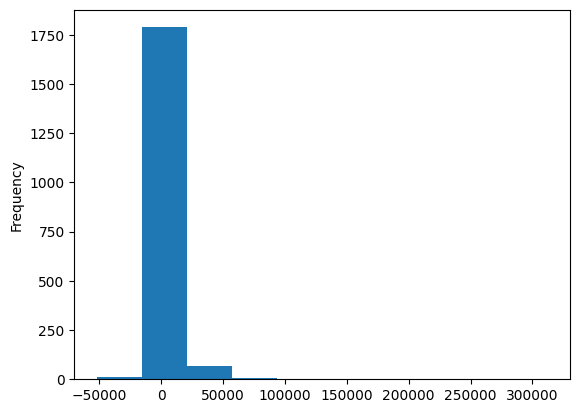

In [1992]:
results['y_hat'].plot(kind='hist')